In [17]:
import sqlite3
import pandas as pd
import numpy as np

# Bulk Download 
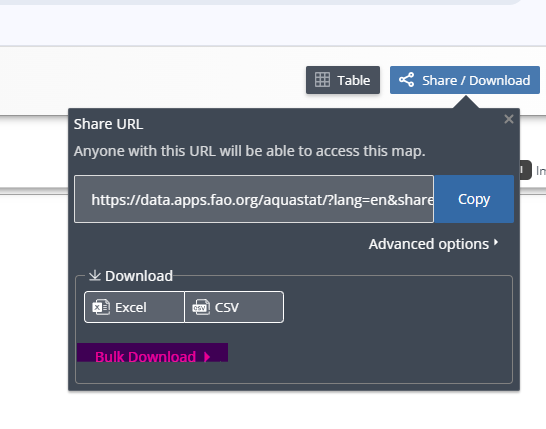
- filename: AQUASTAT Statistics Bulk Download (English).csv

In [18]:
country = pd.read_excel('Country.xlsx')

## Preprocessor

In [3]:
water_fao = pd.read_excel('DataDict.xlsx',
                      sheet_name='Aquastat 18 pre')
# water
# water_fao = water[water['Extended Source Defn'].isnull()]
# n = 'Fresh surface water withdrawal'
# water_fao['Name in Source']
df = pd.read_csv('AQUASTAT Statistics Bulk Download (English)/AQUASTAT Statistics Bulk Download (English).csv') # download data from https://data.apps.fao.org/aquastat/?lang=en
df = df[df['Variable'].isin(water_fao['Name in Source'])]
df[['Variable','Unit']].drop_duplicates()
for j in water_fao.index:
    v = water_fao.loc[j,'Variable']
    n = water_fao.loc[j,'Name in Source']
    if water_fao.isnull().loc[j,'Decimal Places']:
        d = water_fao.loc[j,'Decimal Places']
    else:
        d = int(water_fao.loc[j,'Decimal Places'])
    dt = df[df['Variable'] == n]
    dt = dt[['Country_Name','Year','Value']]
    dt.Value = dt.Value.apply(pd.to_numeric, errors='coerce')
    if water_fao.isnull().loc[j,'Decimal Places']:
        dt = dt
    else:
        dt.Value = round(dt.Value, d)
    first_last = dt.sort_values(['Country_Name','Year']).groupby(dt['Country_Name'])['Value'] \
        .agg(['first', 'last']).reset_index()
    first_last = first_last.rename(columns={"first": "Earliest", "last": "MostRecent"})
    dt = dt.pivot_table(index = ['Country_Name'],
                    columns='Year',
                    values = 'Value').reset_index()
    dt = dt.merge(first_last,
                on = 'Country_Name',
                how = 'left')
    dt = country.merge(dt,
                    on = 'Country_Name',
                    how = 'left')
    dt.drop(columns='Country_Name', inplace=True)
    print(v, dt.shape, 
        #   dt.columns
          )
    dt = dt.set_index(['Country','FIPS_CODE'])
    dt = dt.apply(lambda x: pd.Series.round(x, d))
    # dt.to_csv(f'IFs Import/{v}.csv', 
        #   # index = False
        #   )
dt
    

,Variable,Table,Group,SubGroup,Series,CoVaTrA,Cohort,Definition,Extended Source Defn,Units,...,Proprietary,Name in Source,UsedInPreprocessor,UsedInPreprocessorFileName,CompareOtherForecast,Code in Source,Decimal Places,Country Concordance,Formula,DisplayNotes
0,WasterwaterTreated,SeriesWasterwaterTreated,"Economic, Infrastructure",No Sub Category,Yes,No,No,Wastewater: treated volume (10^9 m3/yr),NaN,10^9 m3/year,...,0,Treated municipal wastewater,1,WATER,0,Treated municipal wastewater,4,IFs Country,NaN,NaN
1,WastewaterProduced,SeriesWastewaterProduced,"Economic, Infrastructure",No Sub Category,Yes,No,No,Wastewater: produced volume (10^9 m3/yr),NaN,10^9 m3/year,...,0,Produced municipal wastewater,1,WATER,0,Produced municipal wastewater,4,IFs Country,NaN,NaN
2,WastewaterTreatedReused,SeriesWastewaterTreatedReused,"Economic, Infrastructure",No Sub Category,Yes,No,No,Treated wastewater reused (10^9 m3/yr),NaN,10^9 m3/year,...,0,Treated municipal wastewater discharged (secon...,1,WATER,0,Direct use of treated municipal wastewater,4,IFs Country,NaN,NaN
3,WaterDesalinated,SeriesWaterDesalinated,"Environment, Infrastructure, Water",Water,Yes,No,No,Desalinated Water Produced,NaN,10^9 m3/year,...,0,Desalinated water produced,1,WATER,0,Desalinated water produced,4,IFs Country,NaN,NaN
4,WaterGroundWithD,SeriesWaterGroundWithD,"Environment, Infrastructure, Water",No Sub Category,Yes,No,No,Ground Water Withdrawal,NaN,10^9 m3/year,...,0,Fresh groundwater withdrawal,1,WATER,0,Fresh groundwater withdrawal (primary and seco...,4,IFs Country,NaN,NaN
5,WaterResExploitGround,SeriesWaterResExploitGround,"Environment, Infrastructure, Water",Water Resources,Yes,No,No,Exploitable: regular renewable groundwater (10...,NaN,10^9 m3/year,...,0,Exploitable: regular renewable groundwater,1,WATER,0,Exploitable: regular renewable groundwater,4,IFs Country,NaN,NaN
6,WaterResExploitSurface,SeriesWaterResExploitSurface,"Environment, Infrastructure, Water",Water Resources,Yes,No,No,Exploitable: total renewable surface water (10...,NaN,10^9 m3/year,...,0,Exploitable: total renewable surface water,1,WATER,0,Exploitable: regular renewable surface water,4,IFs Country,NaN,NaN
7,WaterResOverlap,SeriesWaterResOverlap,"Environment, Infrastructure, Water",Water Resources,Yes,No,No,Overlap between surface and groundwater,NaN,10^9 m3/year,...,0,Overlap between surface water and groundwater,1,WATER,0,Overlap between surface water and groundwater,4,IFs Country,NaN,NaN
8,WaterResTotalExploit,SeriesWaterResTotalExploit,"Agriculture, Infrastructure, Environment, Water",Water Resources,Yes,No,No,Water resources: total exploitable,NaN,10^9 m3/year,...,0,Total exploitable water resources,1,WATER,0,Total exploitable water resources,4,IFs Country,NaN,NaN
9,WaterResTotalRenew,SeriesWaterResTotalRenew,"Agriculture, Infrastructure, Environment, Water",Water Resources,Yes,No,No,Water resources: total renewable (actual),NaN,10^9 m3/year,...,0,Total renewable water resources,1,WATER,0,Total renewable water resources,4,IFs Country,NaN,NaN


## Non-preprocessor

In [19]:

water_fao = pd.read_excel('DataDict.xlsx',
                      sheet_name='Aquastat 42 non-pre')
# water
# water_fao = water[water['Extended Source Defn'].isnull()]
# n = 'Fresh surface water withdrawal'
# water_fao['Name in Source']
df = pd.read_csv('AQUASTAT Statistics Bulk Download (English)/AQUASTAT Statistics Bulk Download (English).csv')
df = df[df['Variable'].isin(water_fao['Code in Source'])]
# df[['Variable','Unit']].drop_duplicates().sort_values(by=['Unit','Variable']).shape
# for n in water_fao['Code in Source'].unique():
#     if n not in df['Variable'].unique():
#         print(n)
for j in water_fao.index:
    v = water_fao.loc[j,'Variable']
    n = water_fao.loc[j,'Code in Source']
    if water_fao.isnull().loc[j,'Decimal Places']:
        d = water_fao.loc[j,'Decimal Places']
    else:
        d = int(water_fao.loc[j,'Decimal Places'])
    dt = df[df['Variable'] == n]
    dt = dt[['Country_Name','Year','Value']]
    dt.Value = dt.Value.apply(pd.to_numeric, errors='coerce')
    if water_fao.isnull().loc[j,'Decimal Places']:
        dt = dt
    else:
        dt.Value = round(dt.Value, d)
    first_last = dt.sort_values(['Country_Name','Year']).groupby(dt['Country_Name'])['Value'] \
        .agg(['first', 'last']).reset_index()
    first_last = first_last.rename(columns={"first": "Earliest", "last": "MostRecent"})
    dt = dt.pivot_table(index = ['Country_Name'],
                    columns='Year',
                    values = 'Value').reset_index()
    dt = dt.merge(first_last,
                on = 'Country_Name',
                how = 'left')
    dt = country.merge(dt,
                    on = 'Country_Name',
                    how = 'left')
    dt.drop(columns='Country_Name', inplace=True)
    print(v, dt.shape, 
        #   dt.columns
          )
    dt = dt.set_index(['Country','FIPS_CODE'])
    dt = dt.apply(lambda x: pd.Series.round(x, d))
    # dt.to_csv(f'IFs Import/{v}.csv', 
        #   index = False
        #   )
dt
    

DesalinatedWater (188, 45) Index([   'Country',  'FIPS_CODE',         1980,         1981,         1982,
               1983,         1984,         1985,         1986,         1987,
               1988,         1989,         1990,         1991,         1992,
               1993,         1994,         1995,         1996,         1997,
               1998,         1999,         2000,         2001,         2002,
               2003,         2004,         2005,         2006,         2007,
               2008,         2009,         2010,         2011,         2012,
               2013,         2014,         2015,         2016,         2017,
               2018,         2019,         2020,   'Earliest', 'MostRecent'],
      dtype='object')
IrWaterReq (188, 38) Index([   'Country',  'FIPS_CODE',         1987,         1988,         1989,
               1990,         1991,         1992,         1993,         1994,
               1995,         1996,         1997,         1998,         1999,
     

,,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,...,2013,2014,2015,2016,2017,2018,2019,2020,Earliest,MostRecent
Country,FIPS_CODE,,,,,,,,,,,,,,,,,,,,,
Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30.6138,30.6138,30.6138,30.6138,30.6138,30.6138,30.6138,30.6138,39.5683,30.6138
Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0291,2.0742,2.1192,2.1126,2.3146,2.1623,2.2914,1.8046,3.3113,1.8046
Algeria,DZA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,46.2615,49.7529,53.2442,54.8556,57.1784,57.1784,57.1784,57.1784,19.0280,57.1784
Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0989,0.0989,0.0989,0.0989,0.0989,0.0989,0.0989,0.0989,0.2460,0.0989
Argentina,ARG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.1875,3.1875,3.1875,3.1875,3.1875,3.1875,3.1875,3.1875,2.4559,3.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Venezuela, Bolivarian Republic",VEN,NaN,NaN,NaN,NaN,NaN,0.1423,0.1476,0.1528,0.1581,0.1633,...,1.2611,1.2611,1.2611,1.2611,1.2611,1.2611,1.2611,1.2611,0.1423,1.2611
Viet Nam,VNM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.7941,8.7941,8.7941,8.7941,8.7941,8.7941,8.7941,8.7941,3.9633,8.7941
Yemen,YEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,154.0476,154.0476,154.0476,154.0476,154.0476,154.0476,154.0476,154.0476,128.5714,154.0476
